# HW4 Opal Issan

In [1]:
import numpy as np
import scipy.linalg as la
from scipy import stats
from scipy.interpolate import interp1d
import scipy
import time
from scipy.sparse import diags
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import copy

In [2]:
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'serif',
        'size'   : 13}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

# Problem 1

# (A) 

In [3]:
# initial condition. 
dx = 0.01
dt = 0.01
x = np.linspace(0, 5, int(5/dx) + 1)
t =  np.linspace(0, 5, int(5/dt) + 1)
u0 = np.zeros(len(x))

for ii in np.arange(len(x)):
    if x[ii] < 2:
        u0[ii] = np.exp((-(x[ii] - 1)**2)/0.1)
    else:
        u0[ii] = 0

In [4]:
print("dx = ", x[1] - x[0])

dx =  0.01


In [5]:
print(dt/dx)

1.0


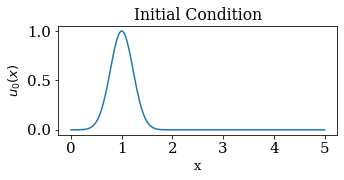

In [6]:
fig, ax = plt.subplots(figsize=(5, 2))
ax.plot(x, u0)
ax.set_xlabel("x")
ax.set_ylabel("$u_{0}(x)$")
_ = ax.set_title("Initial Condition")

In [7]:
def rk3(y, dt):
    f1 = f(y)
    f2 = f(y + 8/15*dt*f1)
    f3 = f(y + 1/4*dt*f1 + 5/12*dt*f2)
    return y + dt*(f1/4 + 3*f3/4)

In [8]:
def f(y):
    # initialize
    y_next = np.zeros(len(y))
    
    # solve for spatial discretization
    for jj in range(len(y)):
        
        if jj != len(y) -1 and jj !=0:
            y_next[jj] = -0.5 *(y[jj+1]**2 - y[jj-1]**2)/(2*dx)
            
    return y_next

In [9]:
res1 = np.zeros((len(x), len(t)))

# initial condition
res1[:, 0] = u0

# propagte the solution using numerical methods: central FDA for spatial and RK3 for time. 
for ii in range(1, len(t)):
    res1[:, ii] = rk3(res1[:, ii-1], dt)

In [10]:
nt1 = np.argmin(np.abs(t - 0.5))
nt2 = np.argmin(np.abs(t - 1))
nt3 = np.argmin(np.abs(t - 1.5))
nt3 = np.argmin(np.abs(t - 1.5))

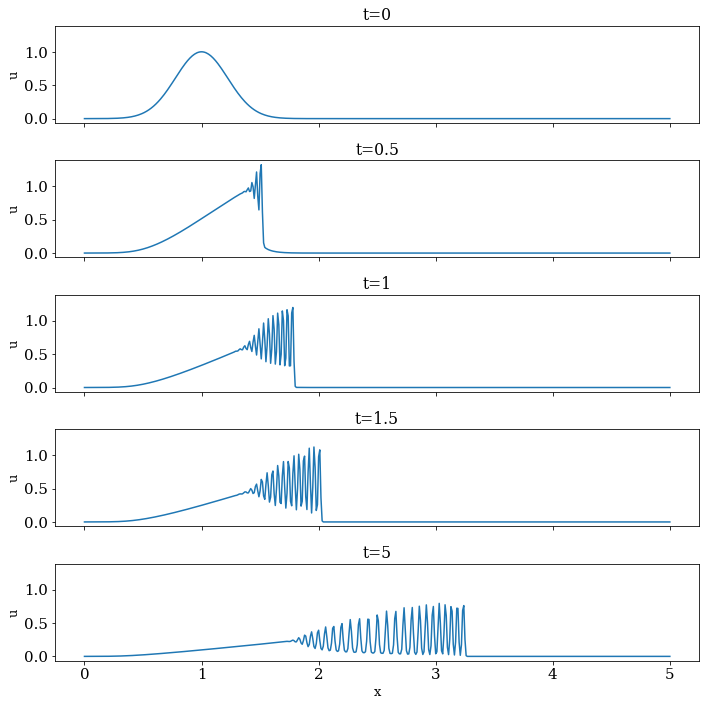

In [11]:
fig, ax = plt.subplots(nrows=5, sharex=True, sharey=True, figsize=(10, 10))

_ = ax[0].plot(x, res1[:, 0]) 
_ = ax[0].set_title("t=0")
_ = ax[1].plot(x, res1[:, nt1]) 
_ = ax[1].set_title("t=0.5")
_ = ax[2].plot(x, res1[:, nt2]) 
_ = ax[2].set_title("t=1")
_ = ax[3].plot(x, res1[:, nt3])
_ = ax[3].set_title("t=1.5")
_ = ax[4].plot(x, res1[:, -1]) 
_ = ax[4].set_title("t=5")

ax[4].set_xlabel("x")

ax[0].set_ylabel("u")
ax[1].set_ylabel("u")
ax[2].set_ylabel("u")
ax[3].set_ylabel("u")
ax[4].set_ylabel("u")

plt.tight_layout()

plt.savefig("figs4/burgers_a.png", dpi=500)

# (B)

In [12]:
def f(y):
    # initialize
    y_next = np.zeros(len(y))
    
    # solve for spatial discretization
    for jj in range(len(y)):
        if jj != len(y) -1 and jj !=0:
            y_next[jj] = -0.5 *(y[jj]**2 - y[jj-1]**2)/(dx)
    return y_next

In [13]:
res = np.zeros((len(x), len(t)))

# initial condition
res[:, 0] = u0

# propagte the solution using numerical methods: central FDA for spatial and RK3 for time. 
for ii in range(1, len(t)):
    res[:, ii] = rk3(res[:, ii-1], dt)

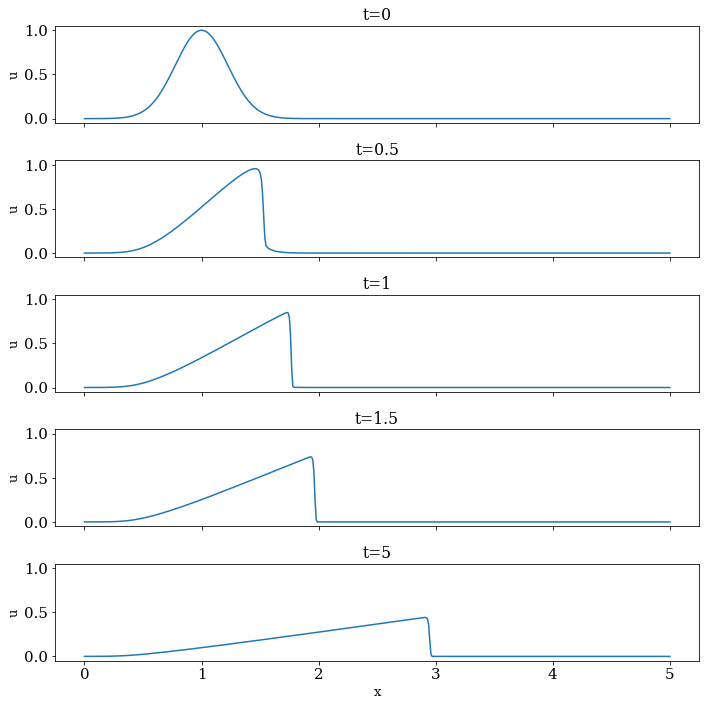

In [14]:
fig, ax = plt.subplots(nrows=5, sharex=True, sharey=True, figsize=(10, 10))

_ = ax[0].plot(x, res[:, 0]) 
_ = ax[0].set_title("t=0")
_ = ax[1].plot(x, res[:, nt1]) 
_ = ax[1].set_title("t=0.5")
_ = ax[2].plot(x, res[:, nt2]) 
_ = ax[2].set_title("t=1")
_ = ax[3].plot(x, res[:, nt3])
_ = ax[3].set_title("t=1.5")
_ = ax[4].plot(x, res[:, -1]) 
_ = ax[4].set_title("t=5")

ax[4].set_xlabel("x")
ax[0].set_ylabel("u")
ax[1].set_ylabel("u")
ax[2].set_ylabel("u")
ax[3].set_ylabel("u")
ax[4].set_ylabel("u")

plt.tight_layout()


plt.savefig("figs4/burgers_b.png", dpi=500)

# (C)

In [15]:
# initial condition. 
dx = 0.02
dt = 0.01
x1 = np.linspace(0, 5, int(5/0.01) + 1)
x = np.linspace(0, 5, int(5/dx) + 1)
t =  np.linspace(0, 5, int(5/dt) + 1)
u0 = np.zeros(len(x))

for ii in np.arange(len(x)):
    if x[ii] < 2:
        u0[ii] = np.exp((-(x[ii] - 1)**2)/0.1)
    else:
        u0[ii] = 0

In [16]:
def f(y):
    # initialize
    y_next = np.zeros(len(y))
    
    # solve for spatial discretization
    for jj in range(len(y)):
        
        if jj != len(y) -1 and jj !=0:
            y_next[jj] = -0.5 *(y[jj+1]**2 - y[jj-1]**2)/(2*dx)
            
    return y_next

In [17]:
res2 = np.zeros((len(x), len(t)))

# initial condition
res2[:, 0] = u0

# propagte the solution usng numerical methods: central FDA for spatial and RK3 for time. 
for ii in range(1, len(t)):
    res2[:, ii] = rk3(res2[:, ii-1], dt)

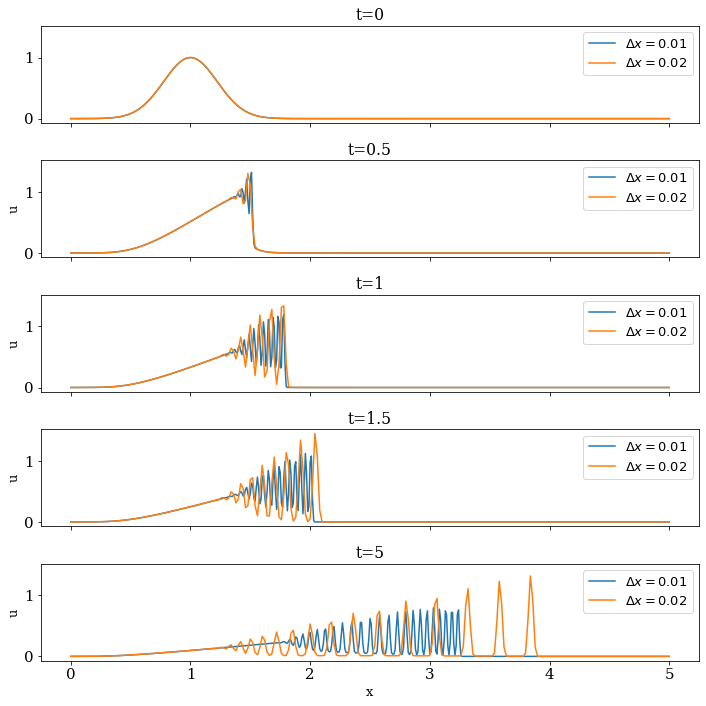

In [18]:
fig, ax = plt.subplots(nrows=5, sharex=True, sharey=True, figsize=(10, 10))

_ = ax[0].plot(x1, res1[:, 0], label="$\Delta x = 0.01$") 
_ = ax[0].plot(x, res2[:, 0], label="$\Delta x = 0.02$") 
_ = ax[0].set_title("t=0")
_ = ax[1].plot(x1, res1[:, nt1], label="$\Delta x = 0.01$") 
_ = ax[1].plot(x, res2[:, nt1], label="$\Delta x = 0.02$") 
_ = ax[1].set_title("t=0.5")
_ = ax[2].plot(x1, res1[:, nt2], label="$\Delta x = 0.01$") 
_ = ax[2].plot(x, res2[:, nt2], label="$\Delta x = 0.02$") 
_ = ax[2].set_title("t=1")
_ = ax[3].plot(x1, res1[:, nt3], label="$\Delta x = 0.01$") 
_ = ax[3].plot(x, res2[:, nt3], label="$\Delta x = 0.02$") 
_ = ax[3].set_title("t=1.5")
_ = ax[4].plot(x1, res1[:, -1], label="$\Delta x = 0.01$")  
_ = ax[4].plot(x, res2[:, -1], label="$\Delta x = 0.02$")  
_ = ax[4].set_title("t=5")

ax[4].set_xlabel("x")
ax[1].set_ylabel("u")
ax[2].set_ylabel("u")
ax[3].set_ylabel("u")
ax[4].set_ylabel("u")

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()

plt.tight_layout()

plt.savefig("figs4/burgers_c.png", dpi=500)

# Problem 2

In [44]:
np.cos(np.pi/32)**2

0.9903926402016153

In [41]:
-2/np.log10(np.cos(np.pi/32))

954.0629112586869

In [45]:
-2/np.log10(np.cos(np.pi/32)**2)

477.03145562934435

In [21]:
x = np.linspace(0, 1, 33)
y = np.linspace(0, 1, 33)
M = 33
MR = M-2

In [22]:
A = diags(-4*np.ones(MR*MR), 0).toarray()
A = A + diags(np.ones(MR*MR - MR), -MR).toarray()
A = A + diags(np.ones(MR*MR - MR), MR).toarray()

diag_a = np.ones((MR)*(MR)-1)
diag_a[MR-1::MR] = 0.0

A = A + diags(diag_a, 1).toarray()
A = A + diags(diag_a, -1).toarray()

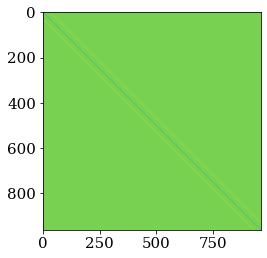

In [23]:
plt.imshow(A)

In [24]:
X, Y = np.meshgrid(x, y)

# Exact solution
#ZE = np.sin(np.pi*X)*np.sin(np.pi*(1-Y)) 

In [25]:
L = np.tril(A) 
U = A- L

iteration = 100
x_res = np.ones(MR*MR)
b = np.zeros(MR*MR)

error = np.zeros((iteration))
for ii in range(int(iteration)):
    x_res = np.dot(np.linalg.inv(L), b - np.dot(U, x_res))
    
    Z = np.zeros((M, M))
    
    for jj in range(MR):
        Z[jj, 1:-1] = x_res[MR*jj: MR*(jj+1)]
    
    error[ii] = np.max(np.abs(Z))

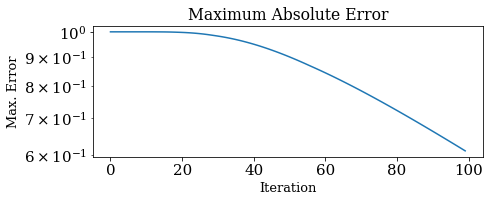

In [26]:
fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(error)
ax.set_title("Maximum Absolute Error")
ax.set_ylabel("Max. Error")
ax.set_xlabel("Iteration")
ax.set_yscale("log")

plt.tight_layout()
plt.savefig("figs4/iteration.png")

In [27]:
Z = np.zeros((M, M))
for ii in range(MR):
    Z[ii, 1:-1] = x_res[MR*ii: MR*(ii+1)]

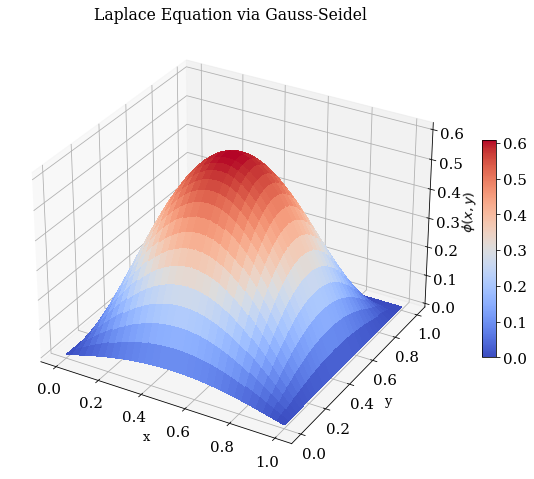

In [28]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={"projection": "3d"})

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.4, aspect=15)
plt.xlabel("x")
plt.ylabel("y")
ax.set_zlabel("$\phi(x, y)$")
ax.set_title("Laplace Equation via Gauss-Seidel")
plt.savefig("figs4/Lapalce_b.png")

In [29]:
p_new = np.zeros((M, M))
p = np.ones((M, M))

for kk in range(iteration):
    for j in range(1, M-1):
            for i in range(1, M-1):
                p_new[i, j] = (0.25 * (p_new[i-1, j]+p[i+1, j]+p_new[i, j-1]+ p[i, j+1]))
    
    p = np.copy(p_new)

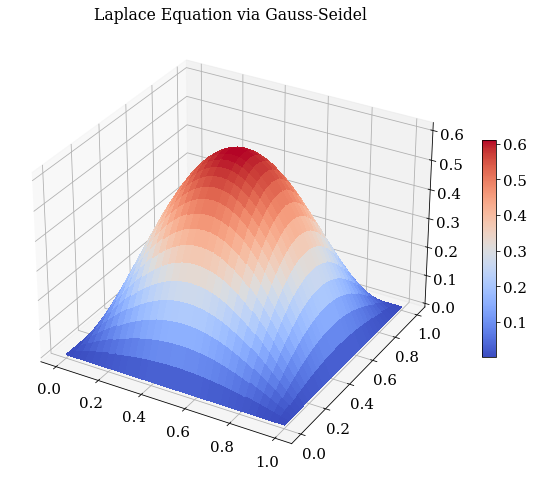

In [30]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={"projection": "3d"})

# Plot the surface.
surf = ax.plot_surface(X, Y, p_new, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.4, aspect=15)

ax.set_title("Laplace Equation via Gauss-Seidel")
plt.savefig("figs4/Lapalce_b.png")

In [31]:
print(np.max(p_new))

0.6135379031853622


# SOR

In [32]:
x = np.linspace(0, 1, 33)
y = np.linspace(0, 1, 33)
M = 33
MR = M-2
iteration = 100
x_res = np.ones((MR, MR))

In [33]:
L = np.tril(A, k=-1) 
U = A - np.tril(A) 
D = A - U - L

In [34]:
error = np.ones((10))

for vv, omega in enumerate(np.linspace(1.05, 1.95, 10)):
    
    p_new = np.zeros((M, M))
    p = np.ones((M, M))

    # solve
    for kk in range(100):
            for j in range(1, M-1):
                for i in range(1, M-1):
                    p_new[i, j] = (1-omega)*p[i, j] + omega/4*(p_new[i-1, j] + p[i+1, j]+ p_new[i, j-1]+ p[i, j+1])


            p = copy.deepcopy(p_new)
            
    error[vv] = np.max(p_new)

In [35]:
np.linspace(1.05, 1.95, 10)

array([1.05, 1.15, 1.25, 1.35, 1.45, 1.55, 1.65, 1.75, 1.85, 1.95])

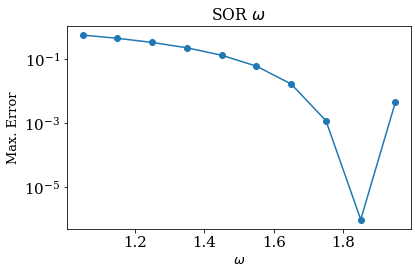

In [36]:
fig, ax = plt.subplots()
plt.scatter(np.linspace(1.05, 1.95, 10), error)
plt.plot(np.linspace(1.05, 1.95, 10), error)
ax.set_yscale("log")

plt.xlabel("$\omega$")
plt.ylabel("Max. Error")

plt.title("SOR $\omega$ ")
plt.tight_layout()
plt.savefig("figs4/convergence_omega.png")

In [37]:
np.linspace(1.05, 2.05, 11)[np.argmin(error)]

1.8499999999999999

In [38]:
omega = 1.85

p_new = np.zeros((M, M))
p = np.ones((M, M))

for kk in range(iteration):
        for j in range(1, M-1):
            for i in range(1, M-1):
                p_new[i, j] = (1 - omega)*p[i, j] + omega/4*(p_new[i-1, j] + p[i+1, j]+ p_new[i, j-1]+ p[i, j+1])
        p = copy.deepcopy(p_new)

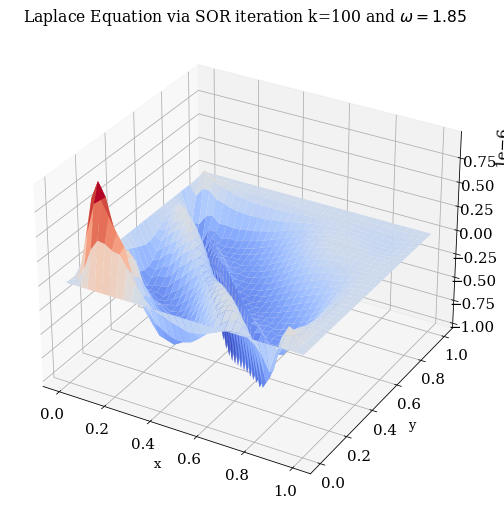

In [39]:
fig, ax = plt.subplots(figsize=(7, 8), subplot_kw={"projection": "3d"})

# Plot the surface.
surf = ax.plot_surface(X, Y, p_new, cmap=cm.coolwarm)

plt.xlabel("x")
plt.ylabel("y")
#ax.set_zscale("log")

ax.set_title("Laplace Equation via SOR iteration k=100 and $\omega = 1.85$")
fig.tight_layout()
plt.savefig("figs4/Lapalce_c.png")

In [40]:
np.max(np.abs(p_new))

1.0109399085066674e-06